In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical 

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

11493376/11490434 [==============================] - 7s 1us/step


((60000, 28, 28), (10000, 28, 28))

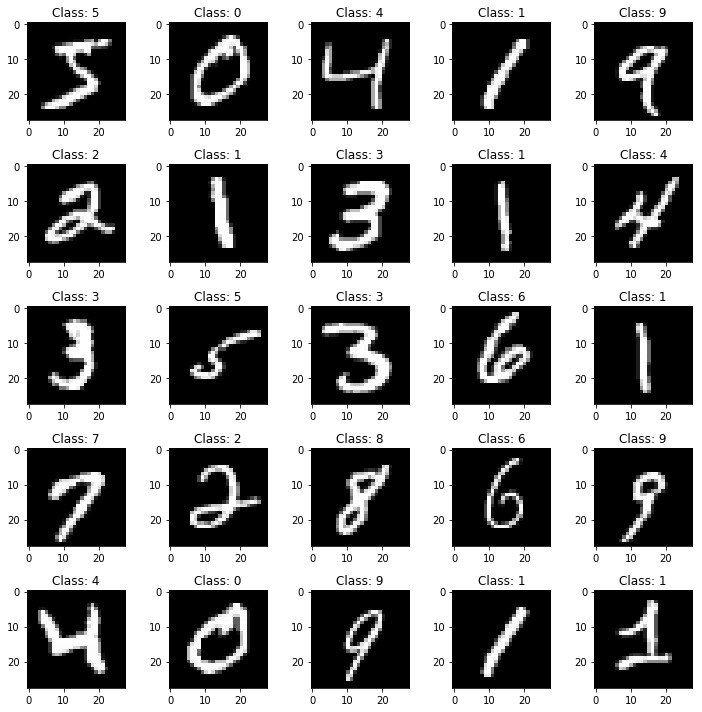

In [3]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx], cmap="gray")
    plt.title("Class: {}".format(y_train[idx]))
    
plt.tight_layout()    

In [4]:
# add dimention
img_rows, img_cols = X_train.shape[1], X_train.shape[1]
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# normalize X
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [8]:
# change y values to list of values
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [11]:
# model architecture
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    
    Dense(512, activation="relu"),
    
    Dense(num_classes, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [12]:
# train
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 108s 2ms/step - loss: 0.1574 - acc: 0.9531 - val_loss: 0.0531 - val_acc: 0.9830
Epoch 2/3
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0445 - acc: 0.9862 - val_loss: 0.0447 - val_acc: 0.9844A: 1 - ETA: 1:20 - loss: 0. - ETA: 1:17 - loss: 0.0476 - ac - ETA: 1:14 - loss: 0.0475 - ETA: 1:12 - los - E - ETA: 39s - loss - ETA: 33s - loss: 0.0461 - acc: 0.98 - ETA: 33s - loss: 0.0460 - - ETA: 32s - loss: 0.0461 - ETA: 30 - ETA: 27s - loss: 0.0462 - acc: 0. - ETA: 27s - loss: 0.0463 - acc - ETA: 26 - ETA - ETA: 6s - loss: 0.0451 - ETA: 3s - loss: 0.0446 - acc: 0.98 - ETA: 3s - loss: 0.04
Epoch 3/3
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0319 - val_acc: 0.9898 - loss: 0.0498 - - ETA: 1:27 - loss: 0.0402 - acc: 0.9 - ETA: 1:27 - loss: 0 - ETA: 1:23 - los

In [13]:
# test
score = model.evaluate(X_test, y_test, verbose=0)

In [14]:
score

[0.03193907552481396, 0.9898]